<a href="https://colab.research.google.com/github/SojeongShin/NLP_2023/blob/main/14_2_%EC%B1%97%EB%B4%87_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [자연어처리]
# 14주차(14-2). 챗봇 만들기


# 202001581 신소정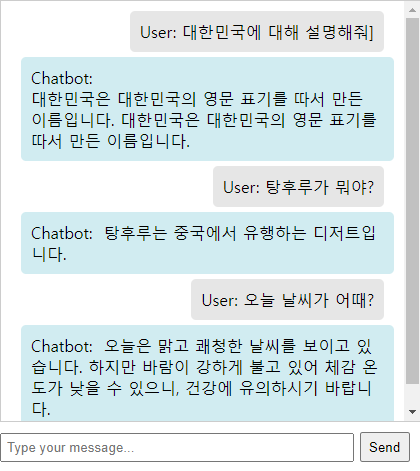 <- 본인의 학번, 이름으로 변경하여 제출
* **모든 셀 실행** 후 제출하시기 바랍니다.
* **실습 (14-2)**이 있습니다. (제출 기한: 12/5(화) 23시 59분까지)

# 이제 Colab 사용에 모든 수강생분들이 어느정도 익숙해 졌을 거라 생각됩니다!
> ##### 중간 중간 **'### ... 이 부분을 완성하시오'** 라는 부분의 코드를 완성해야 합니다.




# [런타임] - [런타임 유형 변경] - [T4 GPU]

# 1. 기본 코드 실행

In [1]:
from flask import Flask ### ... 이 부분을 완성하시오
app = Flask(__name__)

@app.route("/")
def hello():
  return "Hello World !"

if __name__ == "__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [2]:
! pip install pyngrok==4.1.1 ### ... 이 부분을 완성하시오
! pip install flask_ngrok ### ... 이 부분을 완성하시오

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=c1959caaa329d641e767371f1a650b26053ff65ae7e8b57b74141de62a13774e
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok


# 2. Ngrok으로 실행

In [5]:
### ... 이 부분을 완성하시오

from flask_ngrok import run_with_ngrok
from flask import Flask

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def hello():
  return "Hello World !"

if __name__ == "__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://99fd-35-233-235-0.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 01:46:37] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 01:46:37] "GET /favicon.ico HTTP/1.1" 404 -


## authtoken 추가

In [4]:
! ngrok authtoken 2Z6RlqHL5sLPMTg5RYrbVT9v3jB_J2sMrWQST7j4H8dioBQL ### ... 이 부분을 완성하시오

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


## Ngrok 코드 재실행

In [ ]:
### ... 이 부분을 완성하시오

# 3. 템플릿 이용

## index.html

In [6]:
### ... 이 부분을 완성하시오

from flask_ngrok import run_with_ngrok
from flask import Flask, render_template

# Flask 객체 생성
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/") # 접속하는 url
def index():
  return render_template('index.html')

if __name__ == "__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://8b23-35-233-235-0.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 01:54:10] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 01:54:10] "GET /favicon.ico HTTP/1.1" 404 -


## index2.html

In [12]:
### ... 이 부분을 완성하시오

from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request

# Flask 객체 생성
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/") # 접속하는 url
def index():
  return render_template('index2.html')

@app.route("/chat", methods=['POST'])
def chat():
  user_text = request.form['user_text']
  return f"입력 문장: {user_text}"

if __name__ == "__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://dbbd-35-233-235-0.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:06:31] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:06:32] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:06:34] "POST /chat HTTP/1.1" 200 -


# 4. 챗봇 만들기

In [9]:
! pip install transformers ### ... 이 부분을 완성하시오

In [18]:
from transformers import pipeline
pipe = pipeline("text-generation", model="heegyu/polyglot-ko-1.3b-chat", device=0) ### ... 이 부분을 완성하시오

## index2.html으로 테스트 해보기

In [22]:
### ... 이 부분을 완성하시오
from transformers import pipeline
pipe = pipeline("text-generation", model="heegyu/polyglot-ko-1.3b-chat", device=0)

from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request

# Flask 객체 생성
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/") # 접속하는 url
def index():
  return render_template('index2.html')

@app.route("/chat", methods=['POST'])
def chat():
  user_text = request.form['user_text']
  generated_text = pipe(f"### 사용자: {user_text}\n\n### 챗봇:", max_new_tokens=256, eos_token_id=2, pad_token_id=2)

  chatbot_text = generated_text[0]['generated_text'].split('### 챗봇:')[1]

  return f"입력 문장: {user_text}, 출력 문장: {chatbot_text}"

if __name__ == "__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://6033-35-233-235-0.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:36:27] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:36:27] "GET /favicon.ico HTTP/1.1" 404 -


안녕하세요


INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:36:29] "POST /chat HTTP/1.1" 200 -


[{'generated_text': '### 사용자: 안녕하세요\n\n### 챗봇:\n안녕하세요!\n 오늘 당신을 어떻게 도와 드릴까요?'}]


## index3.html으로 테스트 해보기

In [23]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request

# Flask 객체 인스턴스 생성
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def index():
    return render_template('index3.html') ### ... 이 부분을 완성하시오

@app.route('/chat', methods=['POST'])
def chat():
    user_text = request.get_json()['user_message'] ### ... 이 부분을 완성하시오
    generated_text = pipe(f"### 사용자: {user_text}\n\n### 챗봇:", max_new_tokens=256, eos_token_id=2, pad_token_id=2)
    chatbot_text = generated_text[0]['generated_text'].split('### 챗봇:')[1]
    return f"{chatbot_text}" ### ... 이 부분을 완성하시오

if __name__=="__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://8404-35-233-235-0.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:37:20] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:37:21] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:37:29] "POST /chat HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:37:58] "POST /chat HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Dec/2023 02:38:36] "POST /chat HTTP/1.1" 200 -


---

## [[실습 14-2]] 챗봇과 대화한 스크린 샷 추가
챗봇과 2번 이상의 대화를 주고받아 보고, 해당 내용을 스크린 샷으로 첨부하시오.
* 스크린 샷 -> [+텍스트] -> 스크린 샷 파일 붙여넣기
* 잘 안되는 경우, 각각 제출
    * .ipynb 파일과 이미지 파일 2개의 파일을 각각 제출


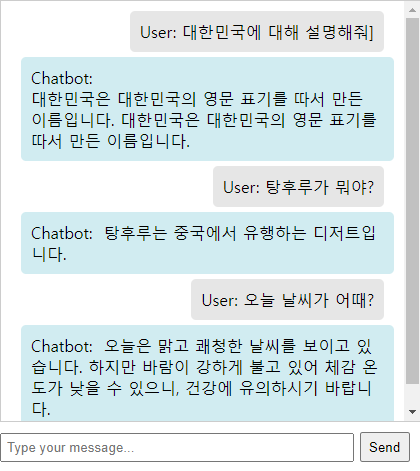

---